# Imports
Numpy import for array processing, python doesn’t have built in array support. The feature of working with native arrays can be used in python with the help of numpy library.

Pandas is a library of python used for working with tables, on importing the data, mostly data will be of table format, for ease manipulation of tables pandas library is imported

Matplotlib is a library of python used to plot graphs, for the purpose of visualizing the results we would be plotting the results with the help of matplotlib library.

Tensorflow import since we are going to use tensorflow framework for building model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

C:\Users\phani.thontepu\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Reading the dataset from data
In this line of code using the read_excel method of pandas library, the dataset has been imported from data folder and stored in dataset variable.

On visualizing the dataset, it contains of two columns X and Y where X is dependent variable and Y is Independent Variable.

>Note : On using Grey Kangaroos dataset,the data is normalised, standardised,having a lot of inbuilt variance and outliers the code would result in a gradient exploding problem. 

In [2]:
dataset = pd.read_csv(r'..\\data\\prices.csv')

On viewing the dataset, it contains of two columns X and Y where X is dependent variable and Y is Independent Variable.

In [3]:
dataset.head()

,X,Y
0,12.4,11.2
1,14.3,12.5
2,14.5,12.7
3,14.9,13.1
4,16.1,14.1


# Creating Dependent and Independent variables
The X Column from the dataset is extracted into an X variable of type numpy, similarly the y variable
X is an independent variable 
Y is dependent variable Inference

In [4]:
X = dataset['X'].values
y = dataset['Y'].values

On execution of first line would result in a pandas Series Object
On using values attribute it would result in an numpy array

In [5]:
print(type(dataset['X']))
print(type(dataset['X'].values))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


# Visualizing the data 
The step is to just see how the dataset is 
On visualization the data would appear something like this
The X and Y attributes would vary based on dataset.

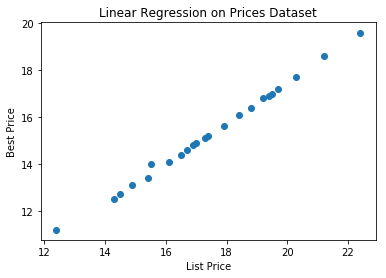

In [6]:
title='Linear Regression on Prices Dataset'
x_axis_label = 'List Price'
y_axis_label = 'Best Price'
plt.scatter(X,y)
plt.title(title)
plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)
plt.show()

# Splitting the data into training set and test set
We are splitting the whole dataset into training and test set where training set is used for fitting the line to data and test set is used to check how good the line if for the data.

In [7]:
X_train,X_test = np.split(X,indices_or_sections = [int(len(X)*0.2)])
y_train,y_test = np.split(y,indices_or_sections = [int(len(X)*0.2)])

# Variables for training 
* `Epochs`: stands for how many time the whole data is put through on forward propagation and one backward propagation.
* `Learning Rate` : is a hyperparameter in backpropagation algorithm to adjust the variables in graph based on loss obtained in forward propagation

In [8]:
epochs = 100
learning_rate = 0.001

# Feature Columns
These are the features or Independent variables used for training. We are transforming the numpy arrays into tensorflow understandable feature columns specifying the coulumn name as key. This feature columns would be fed into tensorflow estimators.

In [9]:
feature_columns = [tf.feature_column.numeric_column(key="X")]

# Creating feature dictionaries
These dictionaries are used in creating in the input function to `model.train ` and `model.predict`
* `features_train ` : used in input function of `model.train`
* `features_test` : used in input function of  ` model.predict`

In [10]:
features_train = {'X':X_train}
features_test  = {'X':X_test}

# Creating an Input function which would return a batch dataset on every call
The input functions are written for the tensorflow estimator function. The estimator would be expecting a batch dataset of which would return a tuple of features and labels.
The type of processing expected is 
```python
def train_input_fn(features, labels, batch_size):
    """An input function for training"""
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))
    # Shuffle, repeat, and batch the examples.
    return dataset.shuffle(1000).repeat().batch(batch_size)
```
It would return a batch `tf.data.Dataset` Object
Another acceptable format of input function is 
```python
def input_evaluation_set():
    features = {'SepalLength': np.array([6.4, 5.0]),
                'SepalWidth':  np.array([2.8, 2.3]),
                'PetalLength': np.array([5.6, 3.3]),
                'PetalWidth':  np.array([2.2, 1.0])}
    labels = np.array([2, 1])
    return features, labels
```
It would return a tuple of two elements, first element features dict and second element labels
Other functions which would support input format are `numpy_input_fn` and `pandas_input_fn`

For more docs and reference
* [Tensorflow Premade Estimator Input Function](https://www.tensorflow.org/guide/premade_estimators "tensorflow premade estimators")
* [Estimator Inputs Module](https://www.tensorflow.org/api_docs/python/tf/estimator/inputs "tf.estimator.inputs")

In [11]:
def input_function(features, labels, batch_size):
    data = tf.data.Dataset.from_tensor_slices((dict(features), labels))     # Convert the inputs to a Dataset.
    return (data.shuffle(10).batch(5).repeat().make_one_shot_iterator().get_next()) #Returning the batch dataset

# Making the lambda function of train dataset
Estimator would be expecting lambda function without any arguments

In [12]:
input_train = lambda: input_function(features_train, y_train,5)

# Build the Estimator
Tensorflow premade estimator are high level api. These estimators provide a very high level implementation of machine learning models.Here in the code we are using the `LinearRegressor` class 

In [13]:
model = tf.estimator.LinearRegressor(feature_columns=feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\phani.thontepu\\AppData\\Local\\Temp\\tmppz20ypp9', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000025FFC6A5F8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


# Train the model
Training is the process of tuning the models parameters with the provided input data.
`model.train` would take care of calling the `input_train` which would feed the model with input data of shuffled batches. The model would be trained for the given number of epochs.

In [14]:
model.train(input_fn = input_train, steps = epochs)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\phani.thontepu\AppData\Local\Temp\tmppz20ypp9\model.ckpt.
INFO:tensorflow:loss = 614.59, step = 1
INFO:tensorflow:Saving checkpoints for 100 into C:\Users\phani.thontepu\AppData\Local\Temp\tmppz20ypp9\model.ckpt.
INFO:tensorflow:Loss for final step: 0.041078217.


# Creating an input function for prediction
Similar to train input function predict input function is also create using pre-built `tf.estimator.input` module

In [15]:
predict_input_fn = tf.estimator.inputs.numpy_input_fn(features_test, shuffle=False)

# Prediction the results
Predicting the y-values for the given test values using the `model.predict` function. This fucntion would return a python generator.

In [16]:
predict_results = model.predict(input_fn=predict_input_fn)

# Extracting the y-predicted values into a numpy array
Converting the values in the generator to numpy array for the ease of plotting.
creating a list -> iterating over the generator and appending values -> converting the list to numpy array

In [17]:
y_predicted = []
for prediction in predict_results:
    y_predicted.append(prediction['predictions'])
y_predicted = np.array(y_predicted)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\phani.thontepu\AppData\Local\Temp\tmppz20ypp9\model.ckpt-100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


# Visualizing the Results
As we have predicted the y-values for a set of x-values we are visualizing the results to check how good did our line fit for our predictions.
The plot shows the red points are the data points are actual values where the blue line is the predictions

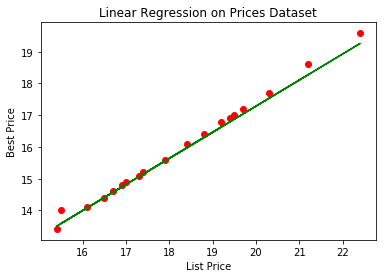

In [18]:
plt.scatter(X_test,y_test,c='red')
plt.plot(X_test,y_predicted,c='green')
plt.title(title)
plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)
plt.show()